Intro : The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. 


In [294]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12.0, 5.0]
import warnings
warnings.filterwarnings("ignore")
import datetime

In [295]:
df=pd.read_csv('aspiring_minds_employability_outcomes_2015.csv')

In [296]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [298]:
# change 'present' value in DOL  to last date of dataset = '2015-01-11' 

In [299]:
np.sort(np.unique(df['DOJ']))
np.sort(np.unique(df['DOL']))

array(['01-01-2011 00:00', '01-01-2012 00:00', '01-01-2013 00:00',
       '01-01-2014 00:00', '01-01-2015 00:00', '01-02-2010 00:00',
       '01-02-2011 00:00', '01-02-2012 00:00', '01-02-2013 00:00',
       '01-02-2014 00:00', '01-02-2015 00:00', '01-03-2005 00:00',
       '01-03-2008 00:00', '01-03-2011 00:00', '01-03-2012 00:00',
       '01-03-2013 00:00', '01-03-2014 00:00', '01-03-2015 00:00',
       '01-04-2011 00:00', '01-04-2012 00:00', '01-04-2013 00:00',
       '01-04-2014 00:00', '01-04-2015 00:00', '01-05-2011 00:00',
       '01-05-2012 00:00', '01-05-2013 00:00', '01-05-2014 00:00',
       '01-05-2015 00:00', '01-06-2009 00:00', '01-06-2011 00:00',
       '01-06-2012 00:00', '01-06-2013 00:00', '01-06-2014 00:00',
       '01-06-2015 00:00', '01-07-2011 00:00', '01-07-2012 00:00',
       '01-07-2013 00:00', '01-07-2014 00:00', '01-07-2015 00:00',
       '01-08-2010 00:00', '01-08-2011 00:00', '01-08-2012 00:00',
       '01-08-2013 00:00', '01-08-2014 00:00', '01-08-2015 00:

In [300]:
current_date = '2015-01-11'
df['DOL'] = df['DOL'].replace('present', current_date)

In [301]:
df['DOJ'] = pd.to_datetime(df['DOJ']) # coverting DOJ to datetime
df['DOL'] = pd.to_datetime(df['DOL']) # coverting DOL to datetime

In [302]:
df['Working_days']=df['DOL']-df['DOJ']# creating new column Working days 
#df['Working_days'].astype(int) 

In [303]:
df['Working_days'] = df['Working_days'].dt.days #converting days into int

In [304]:
df.drop(['DOJ','DOL'], inplace=True,axis=1) # drop DOJ and DOL

In [305]:
df['DOB']=pd.to_datetime( df['DOB'])
#reference_date = datetime.date(2015, 11, 1)
date_str = '2015-01-11'

# Parse the string into a datetime.datetime object
datetime_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d')

df['Age'] = (datetime_obj - df['DOB']).dt.days / 365
df['Age'] = df['Age'].round(1)


In [306]:
df.drop(['DOB'], inplace=True, axis=1)

In [307]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Working_days,Age
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110,561.614557,24.124762
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075,423.895329,1.766469
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,-10.000000,17.600000
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200,362.000000,22.900000
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300,370.000000,23.900000
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,733.000000,25.200000
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400,8771.000000,37.200000


In [308]:
df.shape

(3998, 38)

In [309]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
Designation              0
JobCity                  0
Gender                   0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Working_days             0
A

No null Value

In [310]:
for col in df.columns:
    print(f"Unique values in column {col}: {df[col].unique()}")
    print("-------------------------------------------")

Unique values in column Unnamed: 0: ['train']
-------------------------------------------
Unique values in column ID: [203097 579905 810601 ... 355888 947111 324966]
-------------------------------------------
Unique values in column Salary: [ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000. 

In [311]:
for col in df.columns:
    # Calculate the value counts for the current column
    vc = df[col].value_counts()
    # Print the value counts for the current column
    print(f'Value counts for column {col}:')
    print('------------------------------')
    print(vc)


Value counts for column Unnamed: 0:
------------------------------
train    3998
Name: Unnamed: 0, dtype: int64
Value counts for column ID:
------------------------------
203097     1
283847     1
1118955    1
327371     1
587792     1
          ..
355018     1
806160     1
102065     1
462964     1
324966     1
Name: ID, Length: 3998, dtype: int64
Value counts for column Salary:
------------------------------
300000.0     293
180000.0     239
200000.0     205
325000.0     188
120000.0     165
            ... 
2050000.0      1
144000.0       1
1320000.0      1
755000.0       1
925000.0       1
Name: Salary, Length: 177, dtype: int64
Value counts for column Designation:
------------------------------
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc 

In [312]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'Designation', 'JobCity', 'Gender',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Working_days', 'Age'],
      dtype='object')

In [313]:
#Removing unwanted column

In [314]:
df.drop(['ID','Unnamed: 0','12graduation','CollegeID','CollegeCityID',], inplace=True, axis=1)

In [315]:
df.rename(columns={'10percentage': '10th%','12percentage':'12th%'}, inplace=True)

# Univariate Analysis


In [316]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Numerica columns:', variable)
# Calculate descriptive statistics for each numerical column
for col in num_cols:
    print('\n')
    print('Column:', col)
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Mode:', df[col].mode()[0])
    print('Range:', df[col].max() - df[col].min())
    print('Variance:', df[col].var())
    print('Standard Deviation:', df[col].std())
    print('Minimum:', df[col].min())
    print('Maximum:', df[col].max())

Numerica columns: ['Salary', '10th%', '12th%', 'CollegeTier', 'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Working_days', 'Age']


Column: Salary
Mean: 307699.8499249625
Median: 300000.0
Mode: 300000.0
Range: 3965000.0
Variance: 45257243887.89391
Standard Deviation: 212737.4999568574
Minimum: 35000.0
Maximum: 4000000.0


Column: 10th%
Mean: 77.9254427213606
Median: 79.15
Mode: 78.0
Range: 54.760000000000005
Variance: 97.02569951623319
Standard Deviation: 9.850162410652587
Minimum: 43.0
Maximum: 97.76


Column: 12th%
Mean: 74.46636568284127
Median: 74.4
Mode: 70.0
Range: 58.7
Variance: 120.99852826954525
Standard Deviation: 10.999933102957728
Minimum: 40.0
Maximum: 98.7


Column: CollegeTier
Mean: 1.9257128564282142
Me

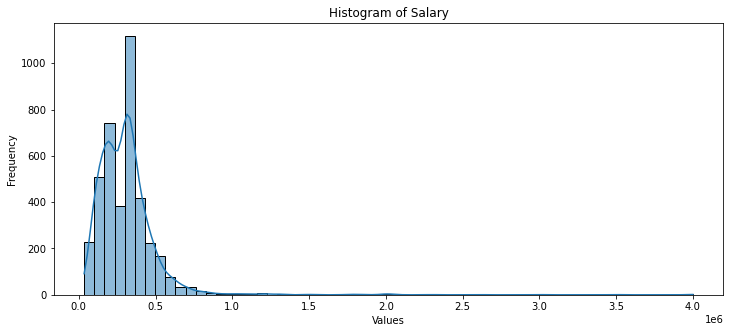

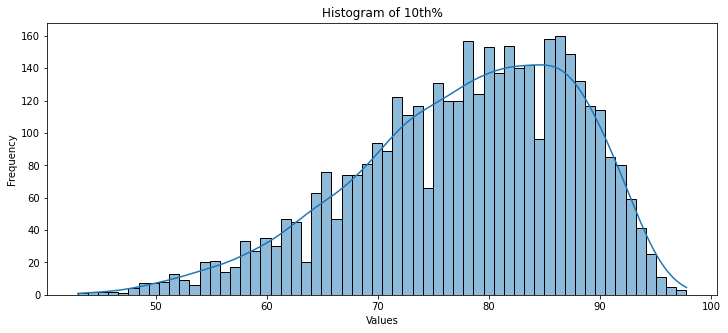

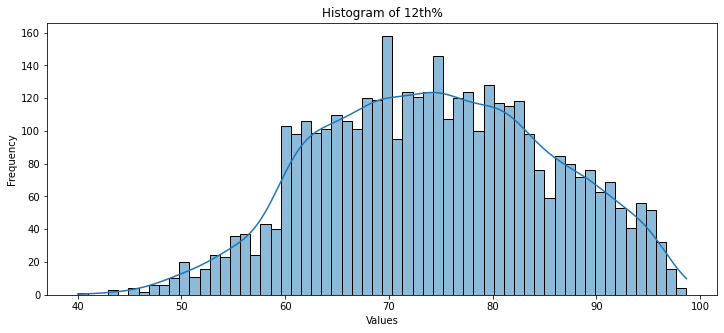

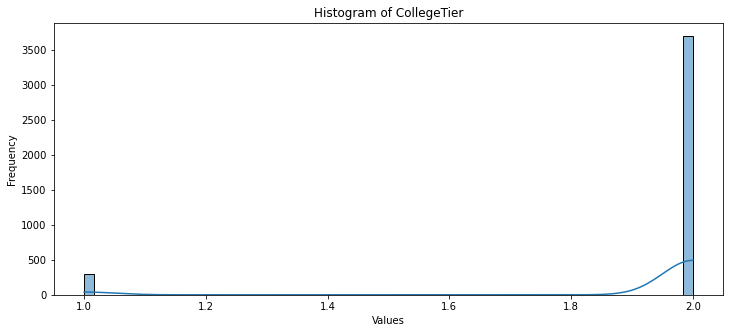

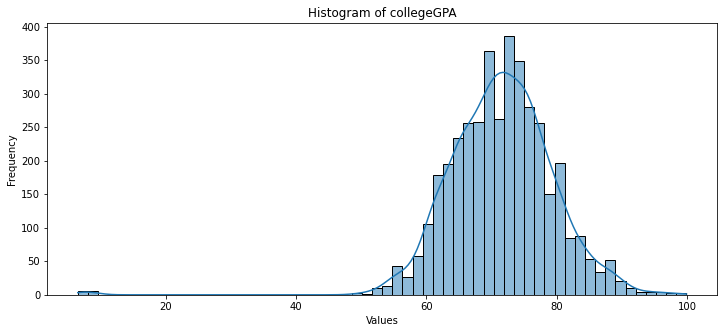

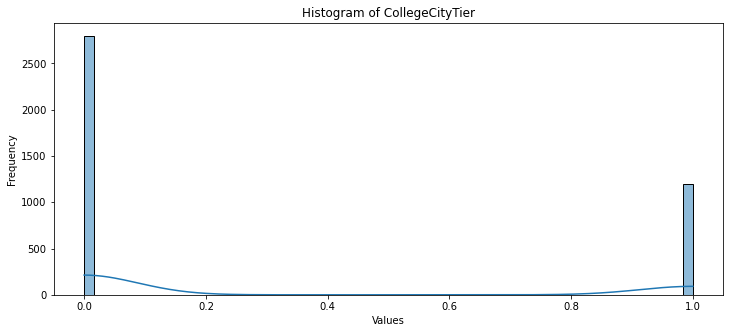

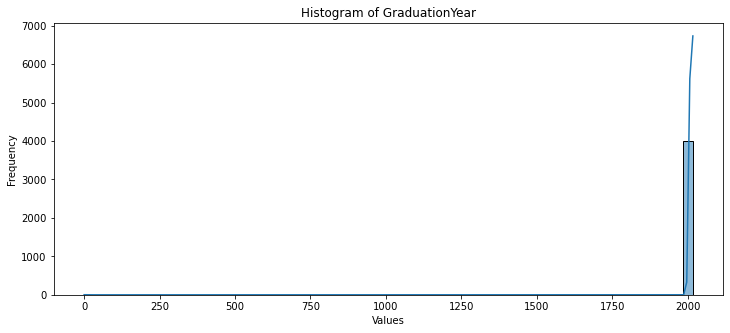

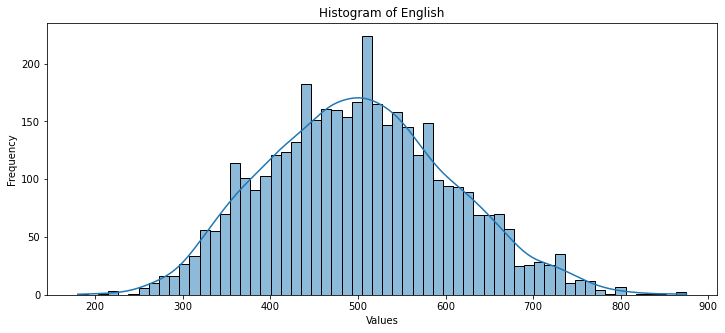

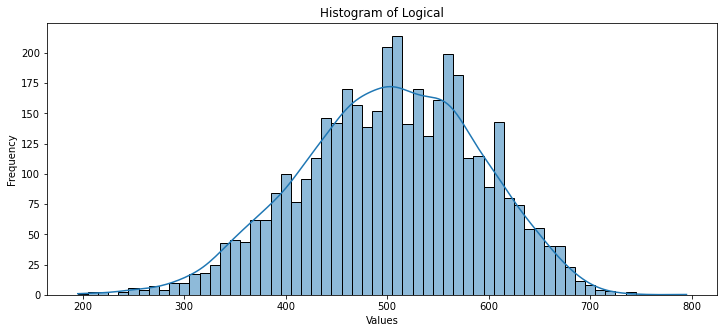

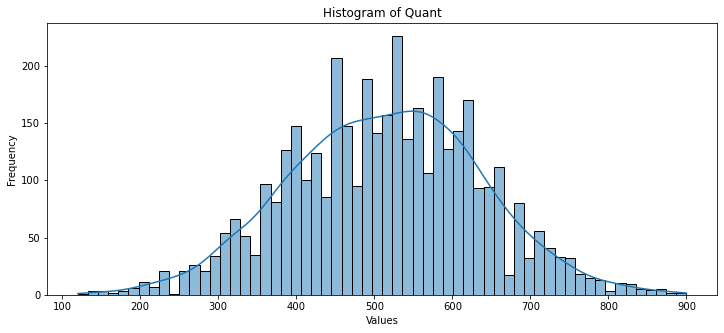

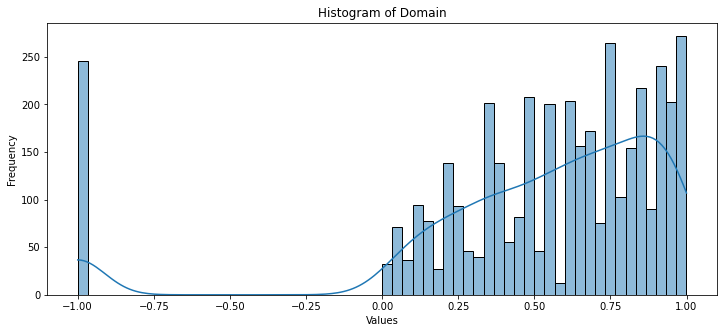

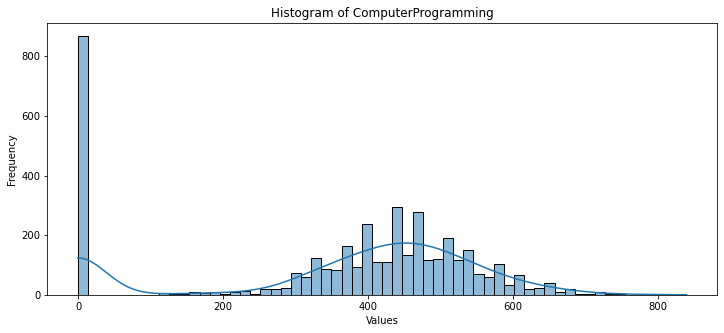

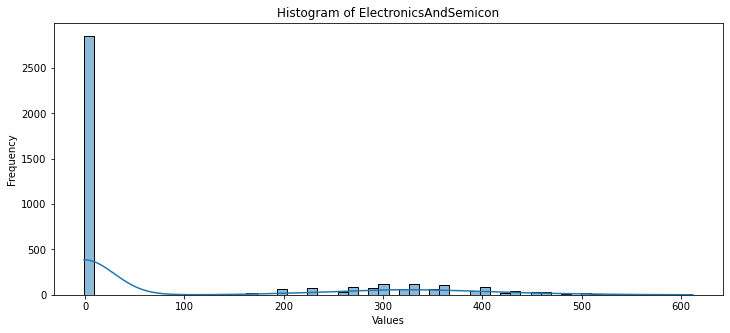

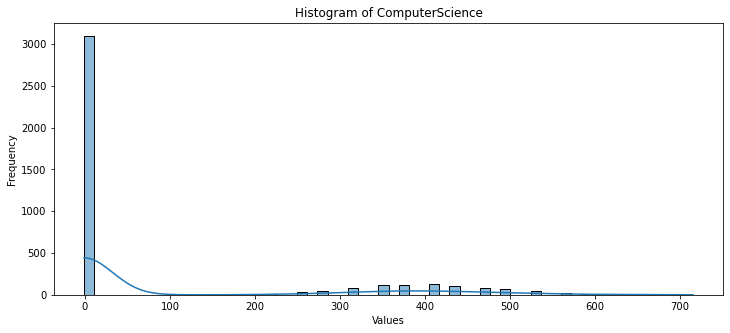

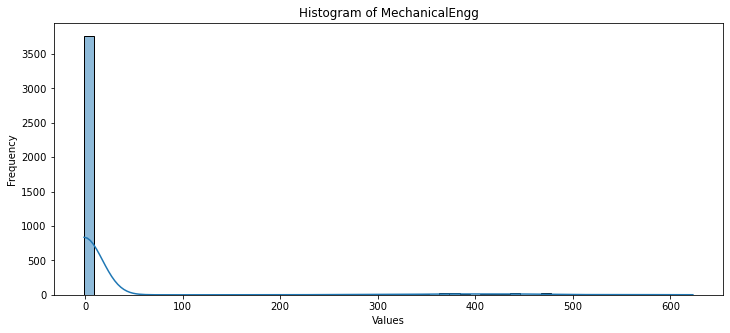

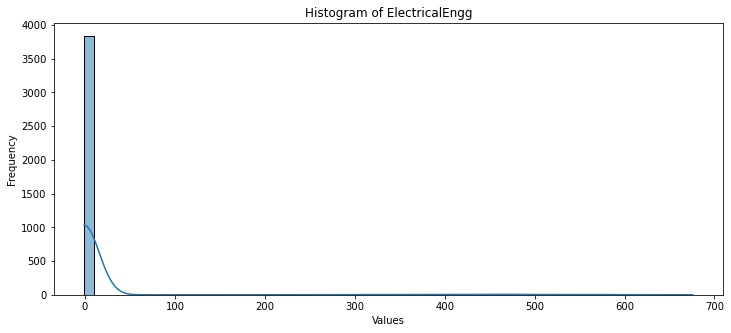

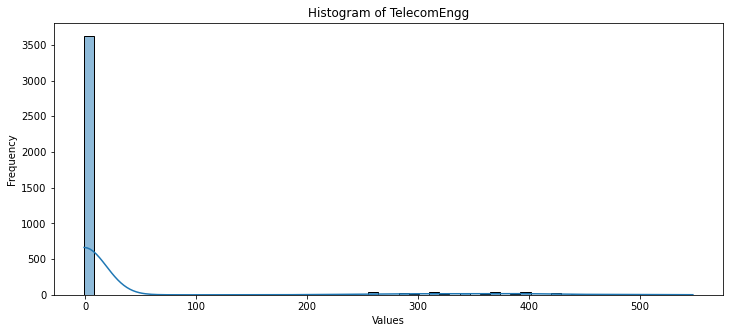

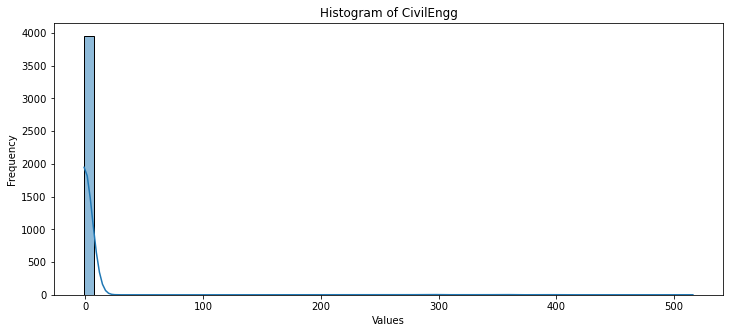

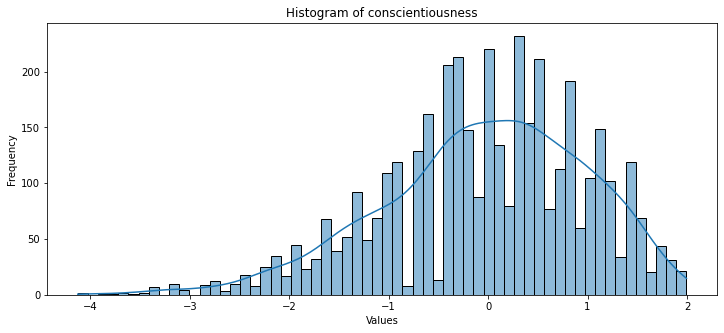

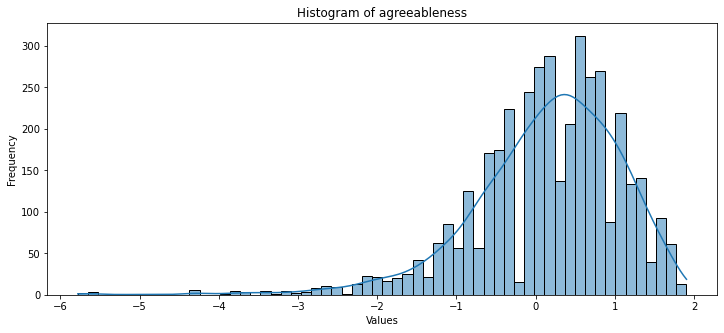

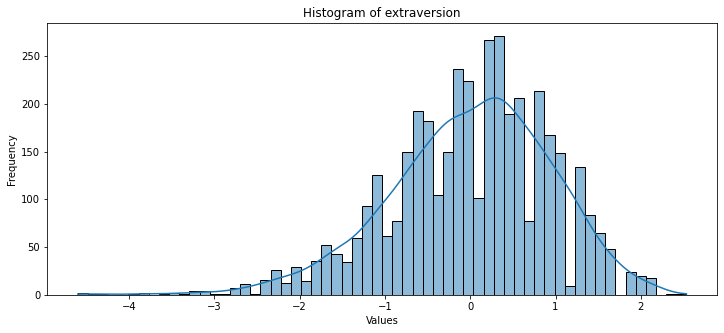

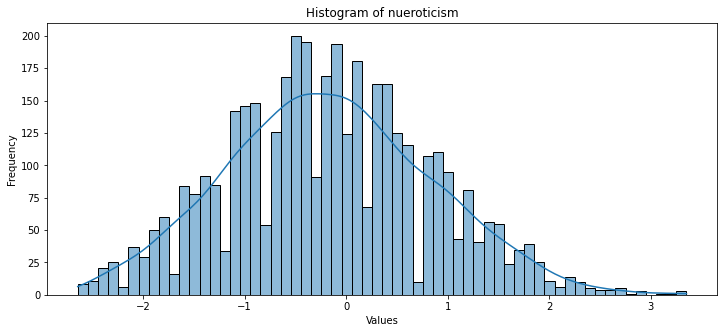

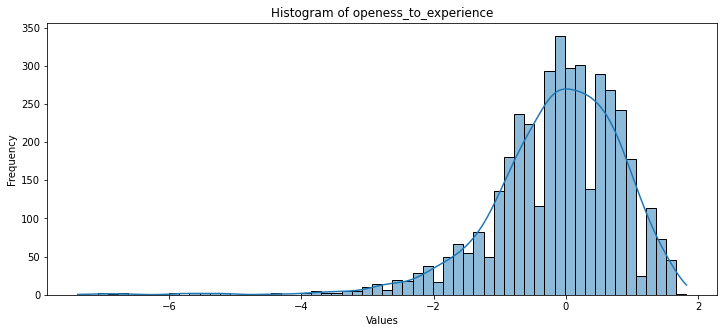

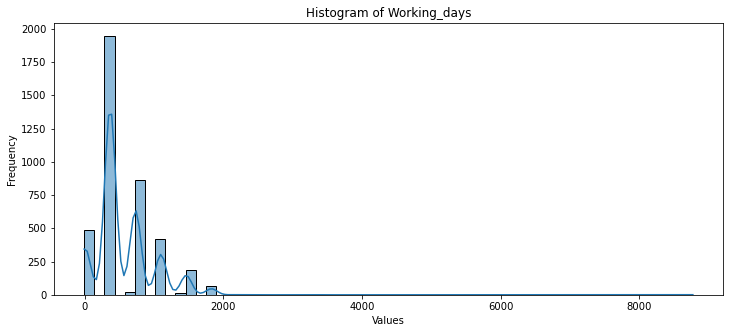

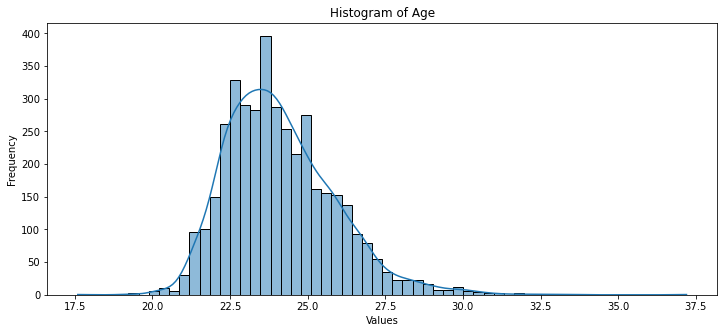

In [317]:
# Create histograms for each numerical column
for col in num_cols:
    sns.histplot(df[col], kde=True, bins=60)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + col)
    plt.show()

# Insights of salary column:

Insights: Salary : 1)The mean salary for the given dataset is approximately 307,699. This gives us an idea of the central tendency of the salaries in the dataset.

2)The median salary is 300,000, which is lower than the mean salary. This suggests that the distribution of salaries in the dataset may be slightly skewed to the right, with some high-paying outliers pushing up the mean.

3)The mode of the Salary column is also 300,000, which is the most common salary in the dataset. This suggests that there may be a cluster of employees with this salary, which could be an interesting segment to investigate further.

4)The range of the Salary column is quite large, at 3,965,000. This indicates that there is a wide variation in salaries across the dataset.

5)The variance of the Salary column is 45,257,243,887.89391, which is quite high. This means that the individual salary values in the dataset are quite spread out from the mean, indicating a wide range of salaries.

6)The standard deviation of the Salary column is 212,737.4999568574, which is also quite high. This tells us that the individual salary values are quite dispersed around the mean value.

)The minimum salary in the dataset is 35,000, while the maximum salary is 4,000,000. This gives us an idea of the range of salaries in the dataset, as well as the presence of potential outliers at the high end of the salary range.

In [318]:
mode_salary = df['Salary'].mode()[0]

# Count the number of employees with the mode salary
num_mode_employees = df['Salary'].value_counts()[mode_salary]

print(f"There are {num_mode_employees} employees with a salary of {mode_salary}")

There are 293 employees with a salary of 300000.0


In [319]:
mode_10th = df['10th%'].mode()[0]
mean_10th = df['10th%'].mean()
x=round(mean_10th, 2)
# Count the number of employees with the mode salary
num_mode_employees =df['10th%'] .value_counts()[mode_10th]
print(f"There are {num_mode_employees} employees with a 10th percentage of {mode_10th}")
print( 'Average percentage is :',x)
num_less_than_70 = (df['10th%'] > 70).sum()
print('No of Employess scored more than 70% in 10th:',num_less_than_70)

There are 76 employees with a 10th percentage of 78.0
Average percentage is : 77.93
No of Employess scored more than 70% in 10th: 3144


# Insights of 10th% column:

1)The mean 10th percentile score for the given dataset is approximately 77.93. This gives us an idea of the central tendency of the 10th percentile scores in the dataset.

2)The median score is 79.15, which is slightly higher than the mean score. This suggests that the distribution of 10th percentile scores in the dataset may be slightly skewed to the left, with some lower-scoring outliers bringing down the mean.

3)The mode of the 10th% column is 78.0, which is the most common 10th percentile score in the dataset. This suggests that there may be a cluster of employees with this score, which could be an interesting segment to investigate further.

4)The range of the 10th% column is 54.76, which indicates that there is a wide variation in 10th percentile scores across the dataset.

5)The variance of the 10th% column is 97.03, which is quite high. This means that the individual 10th percentile score values in the dataset are quite spread out from the mean, indicating a wide range of scores.

6)The standard deviation of the 10th% column is 9.85, which is also quite high. This tells us that the individual 10th percentile score values are quite dispersed around the mean value.

7)The minimum 10th percentile score in the dataset is 43.0, while the maximum score is 97.76. This gives us an idea of the range of 10th percentile scores in the dataset, as well as the presence of potential outliers at the high end of the score range.

# Insights of 12th% column:

In [320]:
mode_12th = df['12th%'].mode()[0]
mean_12th = df['12th%'].mean()
x=round(mean_10th, 2)
# Count the number of employees with the mode salary
num_mode_employees =df['12th%'] .value_counts()[mode_10th]
print(f"There are {num_mode_employees} employees with a 10th percentage of {mode_12th}")
print( 'Average percentage is :',x)
num_less_than_70 = (df['12th%'] > 70).sum()
print('No of Employess scored greater than 70% in 12th:',num_less_than_70)

There are 54 employees with a 10th percentage of 70.0
Average percentage is : 77.93
No of Employess scored greater than 70% in 12th: 2496


1)as we see both 10th and 12th average percentage is same 
2)no of employees scored greater than 70 % in class 10th are higher as copared to class 12th

# college tier

In [321]:
df['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

as we see there is large differnce between tier 1 and tier 2 colleges

In [322]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Numerica columns:', variable)

Numerica columns: ['Salary', '10th%', '12th%', 'CollegeTier', 'collegeGPA', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Working_days', 'Age']


# collegeGPA

collegeGPA is normaly distributed but there are some outliers 

In [323]:
mode_collegeGPA = df['collegeGPA'].mode()[0]
mean_collegeGPA = df['collegeGPA'].mean()
x=round(mean_collegeGPA, 2)
# Count the number of employees with the mode salary
num_mode_employees =df['collegeGPA'] .value_counts()[mode_collegeGPA]
print(f"There are {num_mode_employees} employees with a 10th percentage of {mode_collegeGPA}")
print( 'Average GPA is :',x)
num_less_than_50 = (df['collegeGPA'] < 50).sum()
print('No of Employess have less than 50 GPA:',num_less_than_50)

There are 112 employees with a 10th percentage of 70.0
Average GPA is : 71.49
No of Employess have less than 50 GPA: 13


# 'CollegeCityTier'

In [324]:
df['CollegeCityTier'].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

In [325]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

0 us wrong dgraduation year so we can drop it and also drop 2007

# GraduationYear

most employees graduated in 2013

# English

Values are normaly distributed 


In [326]:
df['English'].value_counts

<bound method IndexOpsMixin.value_counts of 0       515
1       695
2       615
3       635
4       545
       ... 
3993    365
3994    415
3995    475
3996    450
3997    565
Name: English, Length: 3998, dtype: int64>

# age

most of the employees belongs to 23-25 age group 

# Working days

most of employees left the job after 1 year

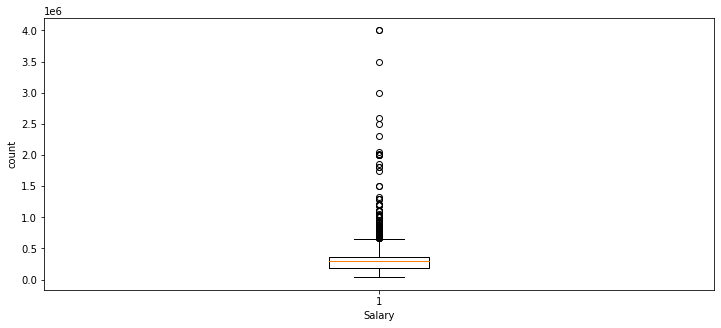

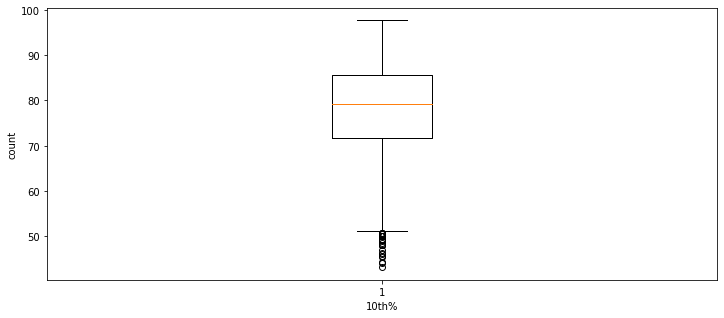

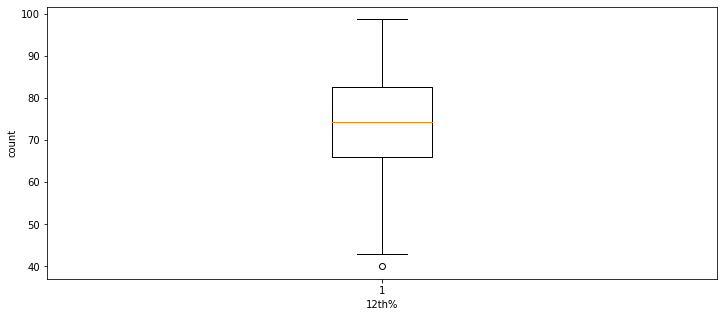

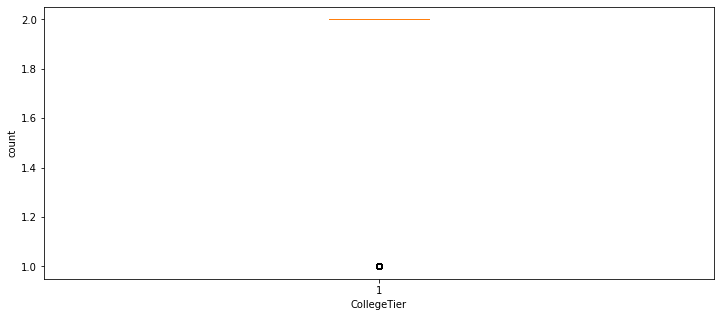

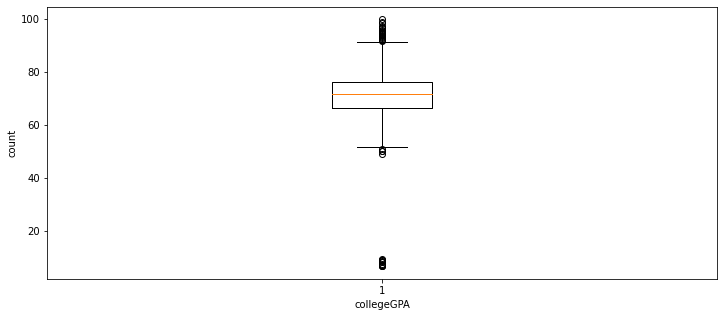

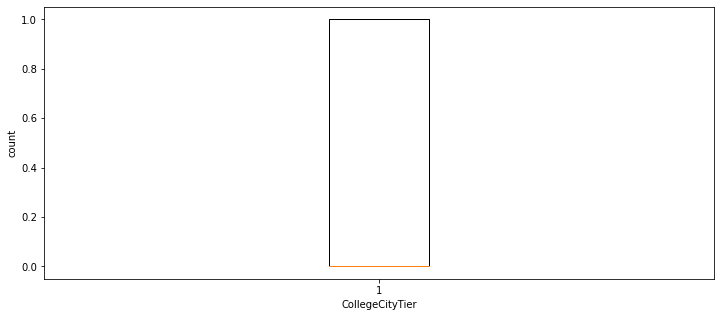

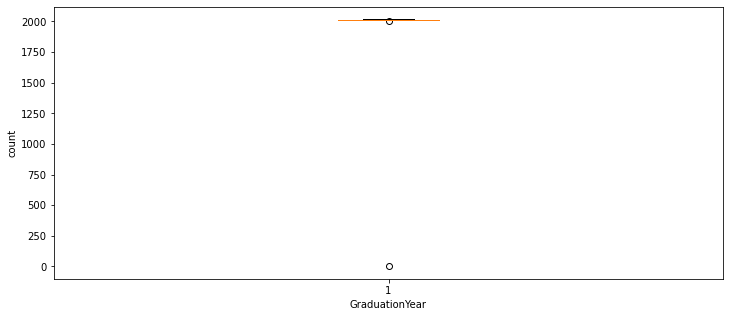

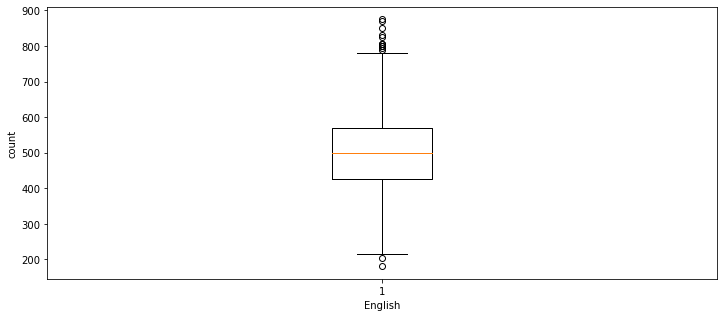

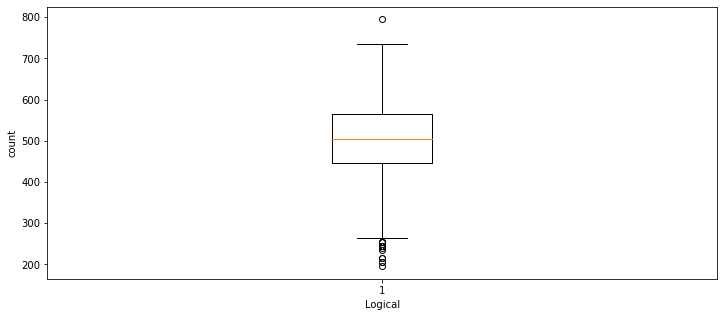

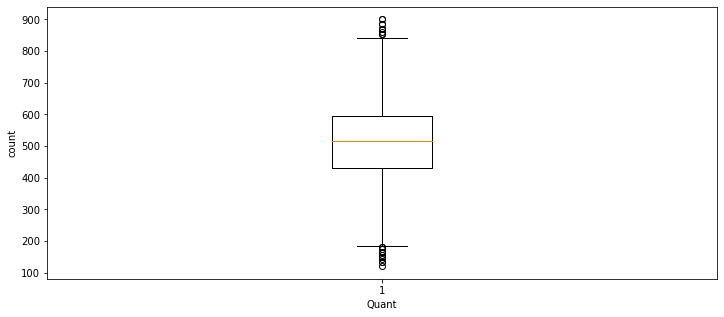

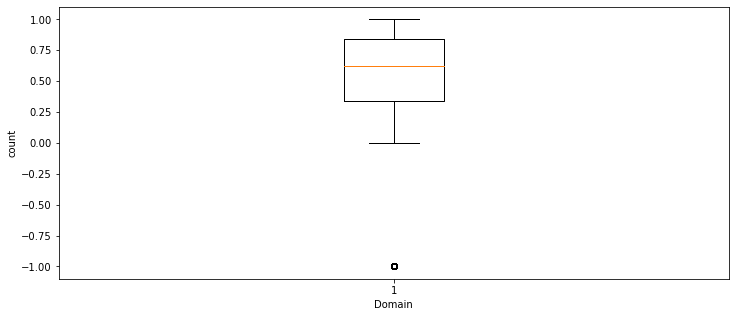

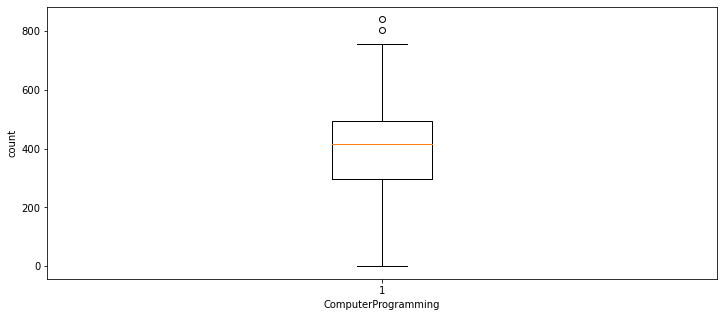

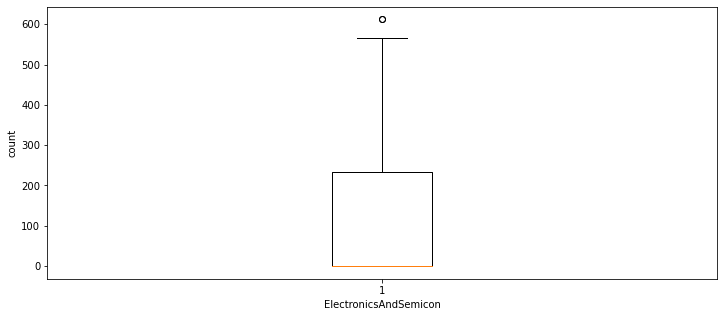

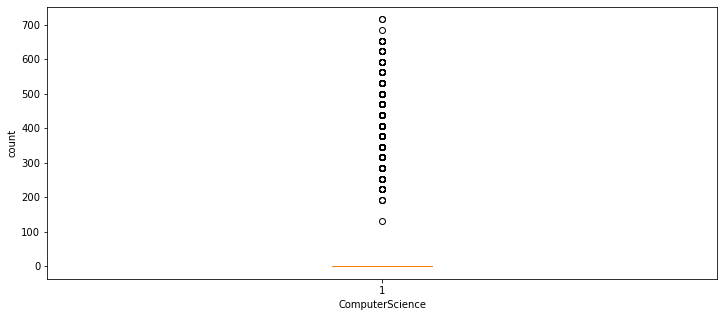

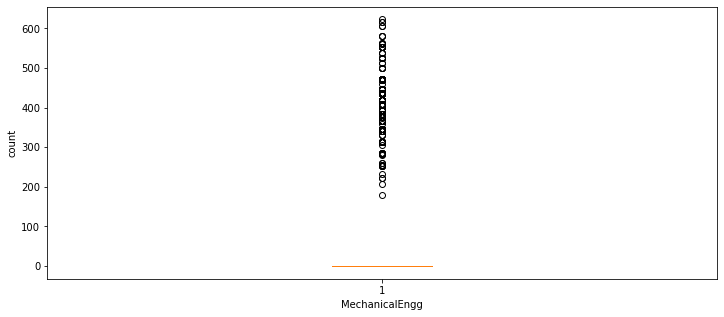

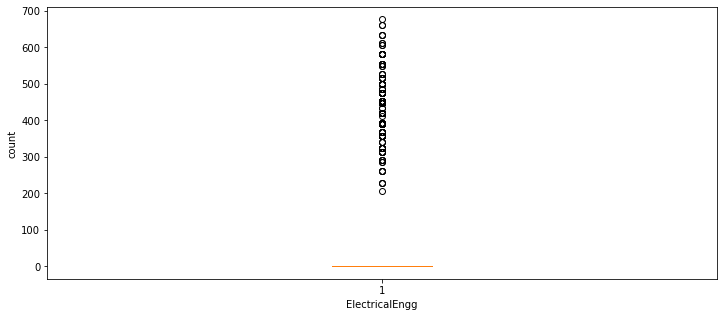

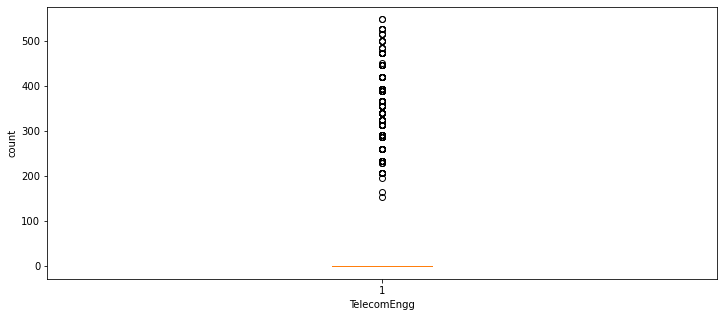

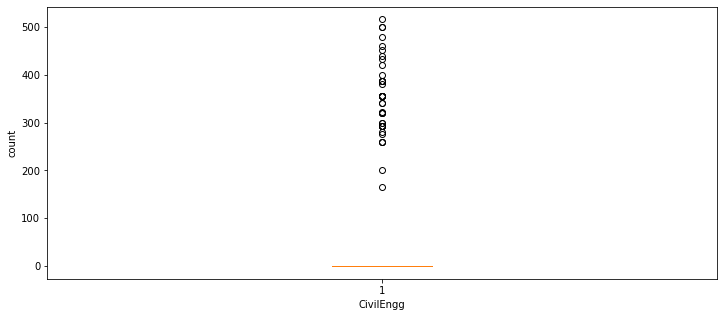

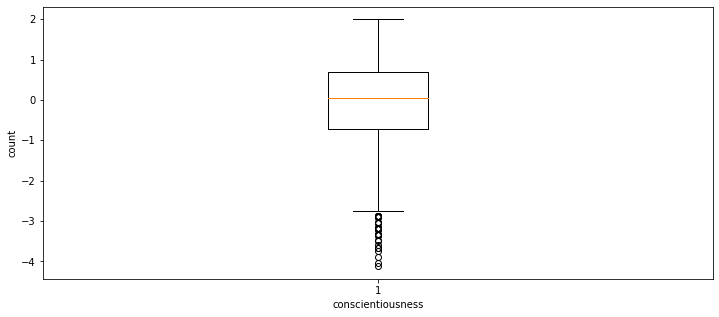

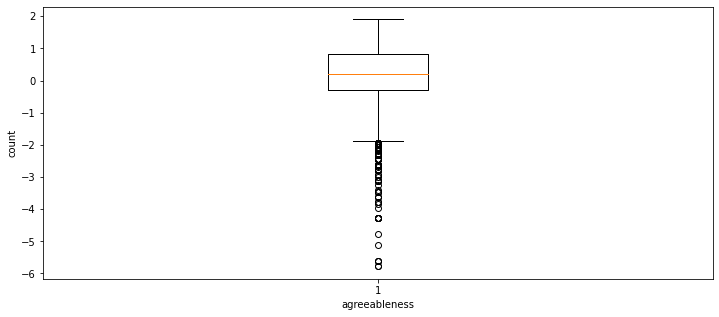

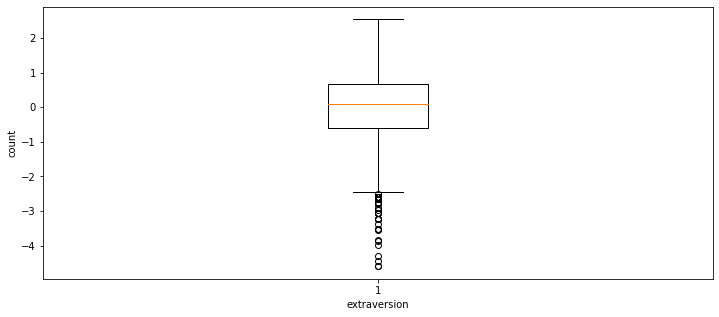

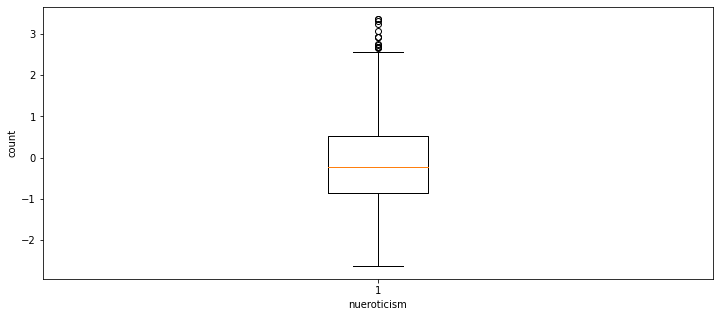

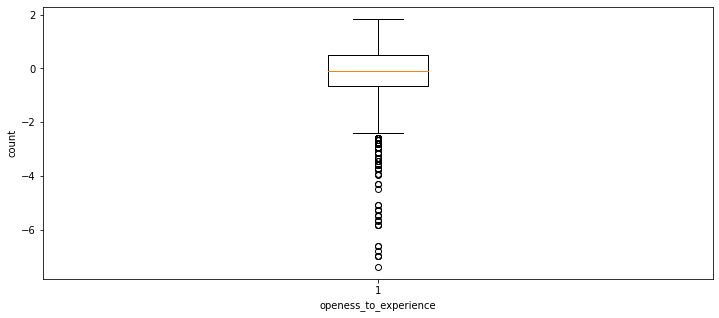

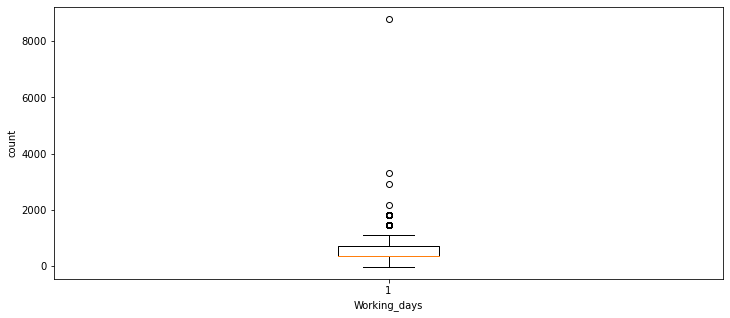

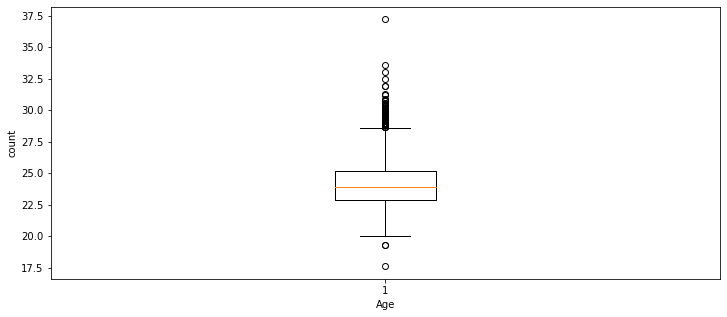

In [327]:
 for col_name in df.columns:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [292]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)


10board                  0.0
Gender                   0.0
nueroticism              0.0
extraversion             0.0
conscientiousness        0.0
collegeGPA               0.0
agreeableness            0.0
Working_days             0.0
TelecomEngg              0.0
Specialization           0.0
Salary                   0.0
Quant                    0.0
MechanicalEngg           0.0
Logical                  0.0
JobCity                  0.0
GraduationYear           0.0
English                  0.0
10th%                    0.0
ElectronicsAndSemicon    0.0
ElectricalEngg           0.0
Domain                   0.0
Designation              0.0
Degree                   0.0
ComputerScience          0.0
ComputerProgramming      0.0
CollegeTier              0.0
CollegeState             0.0
CollegeCityTier          0.0
CivilEngg                0.0
Age                      0.0
12th%                    0.0
12board                  0.0
openess_to_experience    0.0
dtype: float64

In [282]:
def remove_outliers(df,columnName):     #function to delete outliers
  q1=np.percentile(df[columnName],0.25)
  q3=np.percentile(df[columnName],0.75)
  IQR=q3-q1 # inter quartile range 
  UL = q3+1.5* q3  #upper limit
  LL=q1-1.5*q1 # lower limit 
  df =df[(df[columnName] > LL) & (df[columnName] < UL)]
  return df


In [283]:
df = remove_outliers(df, 'ComputerProgramming')

In [293]:
df.shape

(0, 33)

In [285]:
df['Salary'].value_counts().sort_values(ascending=False)

Series([], Name: Salary, dtype: int64)

In [288]:
def winsorize(col, percentiles=(0.05, 0.95)):
    lower = col.quantile(percentiles[0])
    upper = col.quantile(percentiles[1])
    col = np.where(col < lower, lower, col)
    col = np.where(col > upper, upper, col)
    return col



In [289]:
# Example usage
df['Salary'] = winsorize(df['Salary'])